In [18]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import math

%matplotlib qt

<H1>Przygotowanie zbioru danych: XOR<H1>

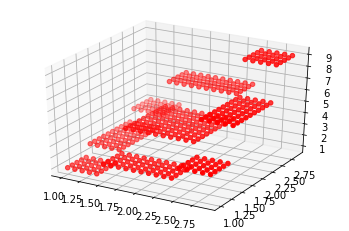

In [20]:
%matplotlib qt
x = np.arange(1, 2, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

#data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5)
dataXround = [int(round(x)) for x in dataX]
dataYround = [int(round(y)) for y in dataY]
data_labels = np.multiply(dataXround, dataYround)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

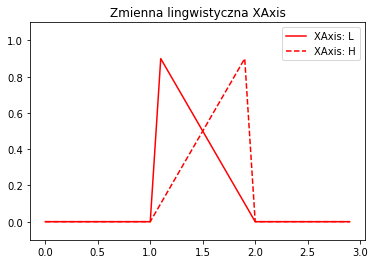

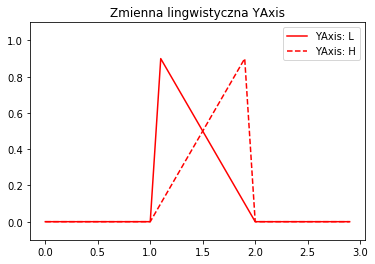

In [21]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# [1, 1.5] [1, 2] [1.5, 2]
mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
# mf1 = [[1, 1, 1, 2], [1, 2, 2, 2]]
# mf1 = [[-0.5, 0.25, 0.5, 0.5]]
mf1 = [[1, 0, 0, 1], [2, 0, 1, 0]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])



#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(np.arange(0, 3, 0.1))
plt.legend()
# plt.xlim(0, 3)

plt.figure()
varY.show(np.arange(0, 3, 0.1))
plt.legend()
# plt.xlim(0, 3)

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[[1, 0, 0, 1], [2, 0, 1, 0]], [[1, 0, 0, 1], [2, 0, 1, 0]]] 
Konkluzje:  [[0.82451612 0.30615574 0.31461715]
 [0.97957043 0.56576    0.85064574]
 [0.79719509 0.95607651 0.88959925]
 [0.46522422 0.70103816 0.33306867]]


E:\Google Drive\Politechnika\SI\lab2\lab2 pycharm\ANFIS.py:90: RuntimeWarning: invalid value encountered in true_divide
  Rnorm = R / Rsum


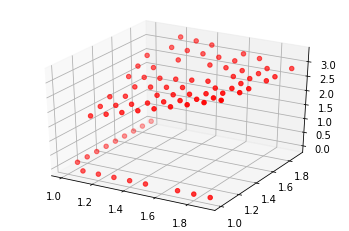

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   1.4820823843518385
Liczba ew:  141149
Liczba it:  100
TIME elapsed:  29.917396068572998


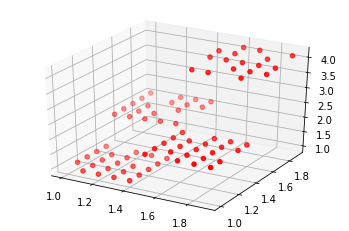

Konkluzje: [[2.14998700e-05 2.14937931e-05 9.99950337e-01]
 [8.02508440e-01 1.69493584e-04 1.19679855e+00]
 [4.02495786e-01 3.20405880e-01 1.99850290e+00]
 [2.00000000e+00 1.26078243e+00 1.99999998e+00]]


In [11]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

print("Konkluzje:", fis.tsk)

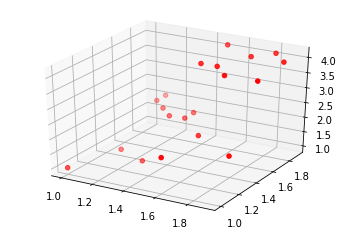

[[3 0 0]
 [0 9 0]
 [0 0 8]]


In [12]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

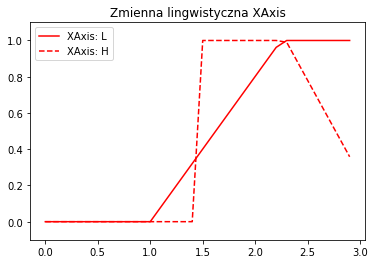

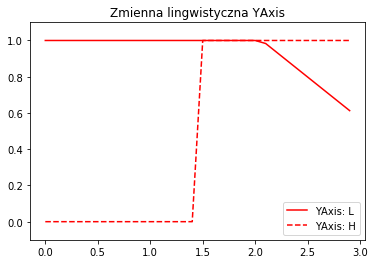

In [13]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 3, 0.1))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 3, 0.1))
plt.legend()

plt.show()

In [14]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [[[3.00521366 1.51584387 1.24729181 2.70438651]
  [1.87181199 0.83785778 0.05104628 0.949375  ]]

 [[0.43495422 3.25775538 1.01601989 2.15960389]
  [2.24035453 1.59058158 0.03391638 3.20088841]]] 
Konkluzje:  [[2.14998700e-05 2.14937931e-05 9.99950337e-01]
 [8.02508440e-01 1.69493584e-04 1.19679855e+00]
 [4.02495786e-01 3.20405880e-01 1.99850290e+00]
 [2.00000000e+00 1.26078243e+00 1.99999998e+00]]


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

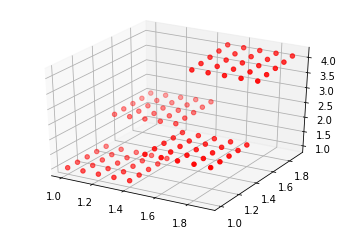

In [15]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

TypeError: cannot unpack non-iterable numpy.int32 object

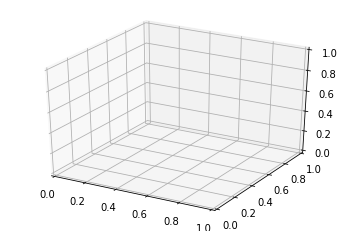

In [17]:
fis.premises = [[1, 0, 0, 1], [2, 0, 1, 0]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4 ...). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, ważne żeby było widać jaka jest zależność.

In [ ]:
%matplotlib auto

In [ ]:
%matplotlib inline